# DSGo 2020 Air Emissions

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgboost

In [459]:
test=pd.read_csv(path+'test.csv')

In [460]:
site=pd.read_csv(path+'site.csv')

In [461]:
data_dictionary=pd.read_csv(path+'data_dictionary.csv')

In [462]:
codes=pd.read_csv(path+'codes.csv')

In [463]:
air_status=pd.read_csv(path+'air_status.csv')

In [464]:
len(test)

996

In [465]:
len(site)

8

In [466]:
len(data_dictionary)

23

In [467]:
len(codes)

58

In [468]:
len(air_status)

6159

In [469]:
test.columns

Index(['SITE_ID', 'DATEON', 'DATEOFF', 'TSO4', 'TNO3', 'TNH4', 'Ca', 'Mg',
       'Na', 'K', 'Cl', 'NSO4', 'NHNO3', 'WSO2', 'TOTAL_SO2', 'FLOW_VOLUME',
       'VALID_HOURS', 'COMMENT_CODES', 'STD2LOCAL_CF', 'TEMP_SOURCE',
       'QA_CODE', 'UPDATE_DATE'],
      dtype='object')

In [470]:
air_status.columns

Index(['SITE_ID', 'DATEON', 'DATEOFF', 'TSO4', 'TNO3', 'TNH4', 'Ca', 'Mg',
       'Na', 'K', 'Cl', 'NSO4', 'NHNO3', 'WSO2', 'TOTAL_SO2', 'TOTAL_NO3',
       'FLOW_VOLUME', 'VALID_HOURS', 'COMMENT_CODES', 'STD2LOCAL_CF',
       'TEMP_SOURCE', 'QA_CODE', 'UPDATE_DATE'],
      dtype='object')

In [471]:
air_status.isna().sum()

SITE_ID             0
DATEON              0
DATEOFF             0
TSO4                0
TNO3                0
TNH4                0
Ca               1223
Mg               1223
Na               1223
K                1227
Cl               2297
NSO4                0
NHNO3               0
WSO2                0
TOTAL_SO2           0
TOTAL_NO3           0
FLOW_VOLUME         0
VALID_HOURS         0
COMMENT_CODES    4842
STD2LOCAL_CF        0
TEMP_SOURCE         0
QA_CODE             0
UPDATE_DATE         0
dtype: int64

In [472]:
test.isna().sum()

SITE_ID          0
DATEON           0
DATEOFF          0
TSO4             0
TNO3             0
TNH4             0
Ca               0
Mg               0
Na               0
K                0
Cl               0
NSO4             0
NHNO3            0
WSO2             0
TOTAL_SO2        0
FLOW_VOLUME      0
VALID_HOURS      0
COMMENT_CODES    0
STD2LOCAL_CF     0
TEMP_SOURCE      0
QA_CODE          0
UPDATE_DATE      0
dtype: int64

# Test File Manipulation

In [473]:
test.head()

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,NHNO3,WSO2,TOTAL_SO2,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE
0,CON186,2003-08-26,2003-09-02,2.0949,1.3105,0.6974,0.3210,0.0709,0.2831,0.0703,...,6.0538,0.7150,0.8077,36.8374,166,T4,1.228750,sa,3,2004-02-02
1,CON186,2004-04-27,2004-05-11,1.5278,1.8541,0.3870,0.5010,0.1011,0.3582,0.0891,...,2.1959,0.4824,0.5314,72.5240,327,G12,1.203630,sa,3,2008-07-18
2,CON186,2004-07-27,2004-08-03,1.4690,0.9887,0.5858,0.2767,0.0468,0.1600,0.0574,...,4.2968,0.3585,0.3944,36.4117,165,T01,1.225983,sa,3,2008-07-18
3,CON186,2007-12-18,2007-12-24,0.2642,0.1826,0.0745,0.0610,0.0174,0.0445,0.0113,...,0.4543,0.1201,0.1470,29.7150,142,G12,1.161903,sa,3,2008-07-18
4,CON186,2010-10-12,2010-10-19,1.0408,0.3775,0.3726,0.1786,0.0273,0.0556,0.0357,...,0.6277,0.1958,0.2310,36.5475,168,T01,1.207224,sa,3,2011-01-31


In [474]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 22 columns):
SITE_ID          996 non-null object
DATEON           996 non-null object
DATEOFF          996 non-null object
TSO4             996 non-null float64
TNO3             996 non-null float64
TNH4             996 non-null float64
Ca               996 non-null float64
Mg               996 non-null float64
Na               996 non-null float64
K                996 non-null float64
Cl               996 non-null float64
NSO4             996 non-null float64
NHNO3            996 non-null float64
WSO2             996 non-null float64
TOTAL_SO2        996 non-null float64
FLOW_VOLUME      996 non-null float64
VALID_HOURS      996 non-null int64
COMMENT_CODES    996 non-null object
STD2LOCAL_CF     996 non-null float64
TEMP_SOURCE      996 non-null object
QA_CODE          996 non-null int64
UPDATE_DATE      996 non-null object
dtypes: float64(14), int64(2), object(6)
memory usage: 171.3+ KB


In [475]:
test['DATEON']=pd.to_datetime(test['DATEON'])

In [476]:
test['DATEOFF']=pd.to_datetime(test['DATEOFF'])

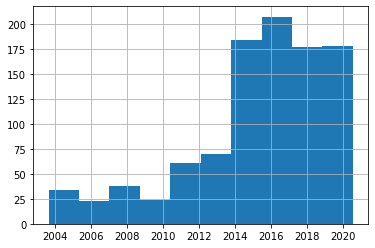

In [477]:
test.DATEON.hist()

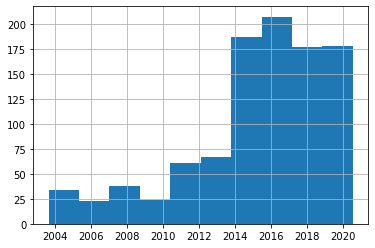

In [478]:
test.DATEOFF.hist()

In [479]:
test['DURATION']=test['DATEOFF']-test['DATEON']

In [480]:
test.head()

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,WSO2,TOTAL_SO2,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE,DURATION
0,CON186,2003-08-26,2003-09-02,2.0949,1.3105,0.6974,0.3210,0.0709,0.2831,0.0703,...,0.7150,0.8077,36.8374,166,T4,1.228750,sa,3,2004-02-02,7 days
1,CON186,2004-04-27,2004-05-11,1.5278,1.8541,0.3870,0.5010,0.1011,0.3582,0.0891,...,0.4824,0.5314,72.5240,327,G12,1.203630,sa,3,2008-07-18,14 days
2,CON186,2004-07-27,2004-08-03,1.4690,0.9887,0.5858,0.2767,0.0468,0.1600,0.0574,...,0.3585,0.3944,36.4117,165,T01,1.225983,sa,3,2008-07-18,7 days
3,CON186,2007-12-18,2007-12-24,0.2642,0.1826,0.0745,0.0610,0.0174,0.0445,0.0113,...,0.1201,0.1470,29.7150,142,G12,1.161903,sa,3,2008-07-18,6 days
4,CON186,2010-10-12,2010-10-19,1.0408,0.3775,0.3726,0.1786,0.0273,0.0556,0.0357,...,0.1958,0.2310,36.5475,168,T01,1.207224,sa,3,2011-01-31,7 days


In [481]:
test['DATE_CHECK']=test['DATEON']>test["DATEOFF"]

In [482]:
sum(test["DATE_CHECK"])

0

In [483]:
test['SITE_ID'].value_counts()


SEK430    224
PIN414    202
LAV410    191
YOS404    183
JOT403    177
DEV412      8
CON186      7
SEK402      4
Name: SITE_ID, dtype: int64

In [484]:
print('Ca= ', air_status['Ca'].isna().sum())
print('K= ',air_status['K'].isna().sum())
print('Na= ',air_status['Na'].isna().sum())
print('Cl= ',air_status['Cl'].isna().sum())
print('Mg= ',air_status['Mg'].isna().sum())

Ca=  1223
K=  1227
Na=  1223
Cl=  2297
Mg=  1223


In [485]:
# set missing values to average for site
air_status['Ca'] = air_status['Ca'].fillna(air_status.groupby('SITE_ID')['Ca'].transform('mean'))
air_status['K'] = air_status['K'].fillna(air_status.groupby('SITE_ID')['K'].transform('mean'))
air_status['Na'] = air_status['Na'].fillna(air_status.groupby('SITE_ID')['Na'].transform('mean'))
air_status['Cl'] = air_status['Cl'].fillna(air_status.groupby('SITE_ID')['Cl'].transform('mean'))
air_status['Mg'] = air_status['Mg'].fillna(air_status.groupby('SITE_ID')['Mg'].transform('mean'))

In [486]:
test['TOTAL_NO3']=test['TNO3']+0.9841*test['NHNO3']

In [487]:
test['TOTAL_SO2_TEST']=test['WSO2']*test['NSO4']*0.667-test['TOTAL_SO2']

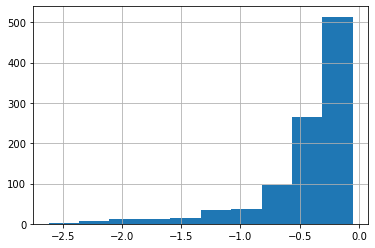

In [488]:
test['TOTAL_SO2_TEST'].hist()

In [489]:
test['TOTAL_SO2_TEST'].mean()

-0.43686789348097355

# Train Data

In [490]:
air_status.head()

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,WSO2,TOTAL_SO2,TOTAL_NO3,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE
0,CON186,2003-06-17,2003-06-24,1.6460,2.6535,1.0740,0.1625,0.0440,0.1980,0.0609,...,0.3286,0.3544,6.0754,36.2704,168,NaN,1.196241,sa,3,2004-02-02
1,CON186,2003-06-24,2003-07-01,1.0356,0.6297,0.4035,0.2331,0.0394,0.1455,0.0444,...,0.4054,0.4466,4.0244,37.0314,167,NaN,1.227204,sa,3,2004-02-02
2,CON186,2003-07-01,2003-07-08,1.5335,1.2570,0.4836,0.2185,0.0759,0.3440,0.1697,...,0.5119,0.5684,5.7479,37.9842,171,NaN,1.228530,sa,3,2004-02-02
3,CON186,2003-07-08,2003-07-15,1.7773,0.8323,0.6537,0.2894,0.0541,0.2134,0.0850,...,0.4154,0.4510,5.0664,37.3987,166,NaN,1.245875,sa,3,2004-02-02
4,CON186,2003-07-15,2003-07-22,2.1637,1.3187,0.7899,0.4331,0.0800,0.2679,0.1382,...,0.6910,0.7512,5.5863,37.1449,166,NaN,1.237604,sa,3,2004-02-02


In [491]:
air_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 23 columns):
SITE_ID          6159 non-null object
DATEON           6159 non-null object
DATEOFF          6159 non-null object
TSO4             6159 non-null float64
TNO3             6159 non-null float64
TNH4             6159 non-null float64
Ca               6159 non-null float64
Mg               6159 non-null float64
Na               6159 non-null float64
K                6159 non-null float64
Cl               6159 non-null float64
NSO4             6159 non-null float64
NHNO3            6159 non-null float64
WSO2             6159 non-null float64
TOTAL_SO2        6159 non-null float64
TOTAL_NO3        6159 non-null float64
FLOW_VOLUME      6159 non-null float64
VALID_HOURS      6159 non-null int64
COMMENT_CODES    1317 non-null object
STD2LOCAL_CF     6159 non-null float64
TEMP_SOURCE      6159 non-null object
QA_CODE          6159 non-null int64
UPDATE_DATE      6159 non-null object
dtypes

In [492]:
air_status['DATEON']=pd.to_datetime(air_status['DATEON'])

In [493]:
air_status['DATEOFF']=pd.to_datetime(air_status['DATEOFF'])

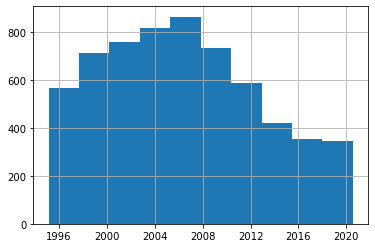

In [494]:
air_status.DATEON.hist()

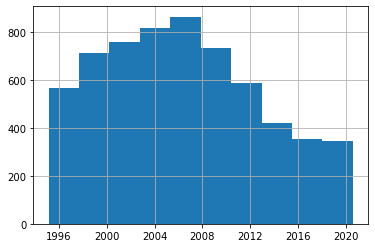

In [495]:
air_status.DATEOFF.hist()

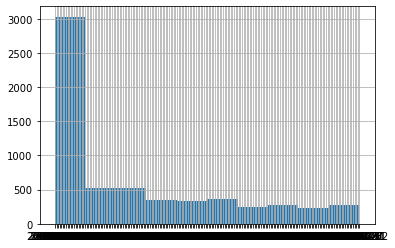

In [496]:
air_status.UPDATE_DATE.hist()

In [497]:
air_status.UPDATE_DATE.describe()

count           6159
unique           193
top       2003-04-30
freq            2076
Name: UPDATE_DATE, dtype: object

In [498]:
air_status.UPDATE_DATE.max()

'2020-09-30'

In [499]:
air_status.UPDATE_DATE.min()

'0002-11-30'

In [500]:
air_status['DURATION']=air_status['DATEOFF']-air_status['DATEON']

In [501]:
air_status.head()

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,TOTAL_SO2,TOTAL_NO3,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE,DURATION
0,CON186,2003-06-17,2003-06-24,1.6460,2.6535,1.0740,0.1625,0.0440,0.1980,0.0609,...,0.3544,6.0754,36.2704,168,NaN,1.196241,sa,3,2004-02-02,7 days
1,CON186,2003-06-24,2003-07-01,1.0356,0.6297,0.4035,0.2331,0.0394,0.1455,0.0444,...,0.4466,4.0244,37.0314,167,NaN,1.227204,sa,3,2004-02-02,7 days
2,CON186,2003-07-01,2003-07-08,1.5335,1.2570,0.4836,0.2185,0.0759,0.3440,0.1697,...,0.5684,5.7479,37.9842,171,NaN,1.228530,sa,3,2004-02-02,7 days
3,CON186,2003-07-08,2003-07-15,1.7773,0.8323,0.6537,0.2894,0.0541,0.2134,0.0850,...,0.4510,5.0664,37.3987,166,NaN,1.245875,sa,3,2004-02-02,7 days
4,CON186,2003-07-15,2003-07-22,2.1637,1.3187,0.7899,0.4331,0.0800,0.2679,0.1382,...,0.7512,5.5863,37.1449,166,NaN,1.237604,sa,3,2004-02-02,7 days


In [502]:
air_status['DATE_CHECK']=air_status['DATEON']>air_status["DATEOFF"]

In [503]:
sum(air_status["DATE_CHECK"])

0

In [504]:
air_status['SITE_ID'].unique()

array(['CON186', 'DEV412', 'JOT403', 'LAV410', 'PIN414', 'SEK402',
       'SEK430', 'YOS404'], dtype=object)

In [505]:
air_status['TOTAL_NO3_TEST']=air_status['TNO3']+0.9841*air_status['NHNO3']

In [506]:
air_status['TOTAL_SO2_TEST']=air_status['WSO2']*air_status['NSO4']*0.667-air_status['TOTAL_SO2']

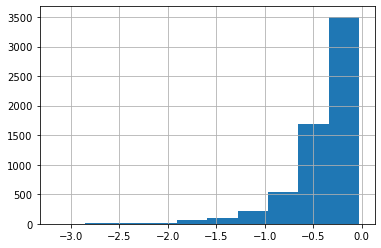

In [507]:
air_status['TOTAL_SO2_TEST'].hist()

In [508]:
air_status['TOTAL_NO3_TEST']=air_status['TOTAL_NO3_TEST']-air_status['TOTAL_NO3']

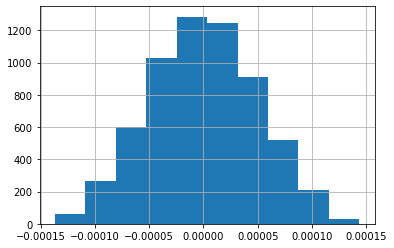

In [509]:
air_status['TOTAL_NO3_TEST'].hist()

In [510]:
#Lots of variation, suggest using 'TOTAL_SO2_TEST' instead

In [511]:
test_key_fields=['TSO4','TNO3','TNH4','Ca','Mg','Na','K','Cl','NSO4','NHNO3','WSO2','TOTAL_SO2','TOTAL_NO3','FLOW_VOLUME']

In [512]:
#Lots of variation, suggest using 'TOTAL_SO2_TEST' instead

In [513]:
site.head()

,SITE_ID,location
0,PIN414,Pinnacles NM
1,SEK430,Sequoia NP - Ash Mountain
2,DEV412,Death Valley NM
3,SEK402,Sequoia NP - Lookout Pt
4,JOT403,Joshua Tree NP


In [514]:
len(test)

996

In [515]:
test=test.merge(site,on='SITE_ID')

In [516]:
len(test) #Check if we lost any records - no, in this case

996

In [517]:
test.rename({' location':'location'},inplace=True,axis='columns')

In [518]:
test.columns

Index(['SITE_ID', 'DATEON', 'DATEOFF', 'TSO4', 'TNO3', 'TNH4', 'Ca', 'Mg',
       'Na', 'K', 'Cl', 'NSO4', 'NHNO3', 'WSO2', 'TOTAL_SO2', 'FLOW_VOLUME',
       'VALID_HOURS', 'COMMENT_CODES', 'STD2LOCAL_CF', 'TEMP_SOURCE',
       'QA_CODE', 'UPDATE_DATE', 'DURATION', 'DATE_CHECK', 'TOTAL_NO3',
       'TOTAL_SO2_TEST', 'location'],
      dtype='object')

In [519]:
test.head()

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE,DURATION,DATE_CHECK,TOTAL_NO3,TOTAL_SO2_TEST,location
0,CON186,2003-08-26,2003-09-02,2.0949,1.3105,0.6974,0.3210,0.0709,0.2831,0.0703,...,T4,1.228750,sa,3,2004-02-02,7 days,False,7.268045,-0.741458,Converse Station
1,CON186,2004-04-27,2004-05-11,1.5278,1.8541,0.3870,0.5010,0.1011,0.3582,0.0891,...,G12,1.203630,sa,3,2008-07-18,14 days,False,4.015085,-0.507751,Converse Station
2,CON186,2004-07-27,2004-08-03,1.4690,0.9887,0.5858,0.2767,0.0468,0.1600,0.0574,...,T01,1.225983,sa,3,2008-07-18,7 days,False,5.217181,-0.381535,Converse Station
3,CON186,2007-12-18,2007-12-24,0.2642,0.1826,0.0745,0.0610,0.0174,0.0445,0.0113,...,G12,1.161903,sa,3,2008-07-18,6 days,False,0.629677,-0.143764,Converse Station
4,CON186,2010-10-12,2010-10-19,1.0408,0.3775,0.3726,0.1786,0.0273,0.0556,0.0357,...,T01,1.207224,sa,3,2011-01-31,7 days,False,0.995220,-0.224117,Converse Station


In [520]:
test['location'].unique()

array([' Converse Station', ' Death Valley NM', ' Joshua Tree NP',
       ' Lassen Volcanic NP', ' Pinnacles NM', ' Sequoia NP - Lookout Pt',
       ' Sequoia NP - Ash Mountain', ' Yosemite NP - Turtleback Dome'],
      dtype=object)

In [521]:
data_dictionary.head()

,COLUMN_NAME,UNIT,DATA_TYPE,DESCRIPTION
0,SITE_ID,NaN,CHAR,Site identification code. See the file site.cs...
1,DATEON,NaN,DATE,"Date the sample collection began, Local Standa..."
2,DATEOFF,NaN,DATE,"Date the sample collection ended, Local Standa..."
3,TSO4,ug/m^3,NUMBER,Sulfate (SO4) concentration from Teflon filter...
4,TNO3,ug/m^3,NUMBER,Nitrate (NO3) concentration from Teflon filter...


In [522]:
codes.head()

,COLUMN_NAME,CODE,DESCRIPTION,VALID
0,%_F,!,X and U apply,V
1,%_F,#,Both U and L flags apply,V
2,%_F,$,L and U apply,V
3,%_F,&,Ambient concentration data measured/collected ...,V
4,%_F,<,Missing < 25% of hourly sampling period,V


In [523]:
air_status.head()

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE,DURATION,DATE_CHECK,TOTAL_NO3_TEST,TOTAL_SO2_TEST
0,CON186,2003-06-17,2003-06-24,1.6460,2.6535,1.0740,0.1625,0.0440,0.1980,0.0609,...,168,NaN,1.196241,sa,3,2004-02-02,7 days,False,0.000013,-0.345918
1,CON186,2003-06-24,2003-07-01,1.0356,0.6297,0.4035,0.2331,0.0394,0.1455,0.0444,...,167,NaN,1.227204,sa,3,2004-02-02,7 days,False,0.000051,-0.429916
2,CON186,2003-07-01,2003-07-08,1.5335,1.2570,0.4836,0.2185,0.0759,0.3440,0.1697,...,171,NaN,1.228530,sa,3,2004-02-02,7 days,False,0.000040,-0.539480
3,CON186,2003-07-08,2003-07-15,1.7773,0.8323,0.6537,0.2894,0.0541,0.2134,0.0850,...,166,NaN,1.245875,sa,3,2004-02-02,7 days,False,-0.000010,-0.436177
4,CON186,2003-07-15,2003-07-22,2.1637,1.3187,0.7899,0.4331,0.0800,0.2679,0.1382,...,166,NaN,1.237604,sa,3,2004-02-02,7 days,False,-0.000050,-0.709581


In [524]:
corr=air_status[test_key_fields].corr()

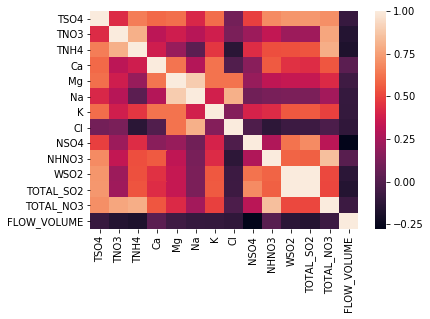

In [525]:
sns.heatmap(corr)

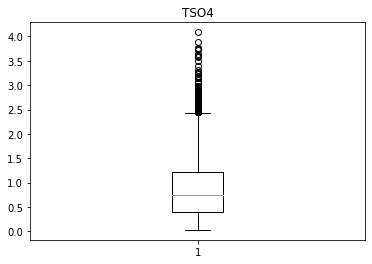

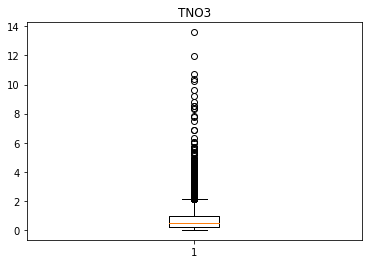

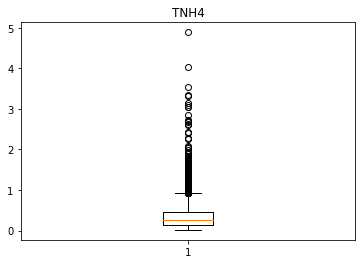

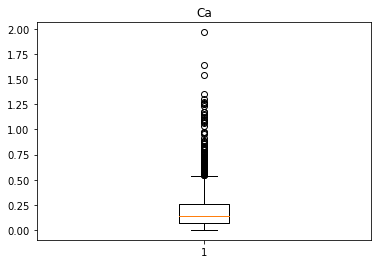

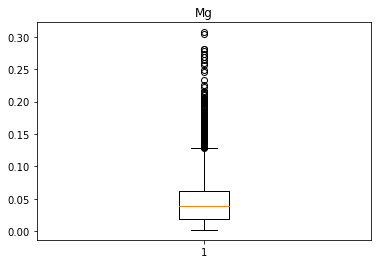

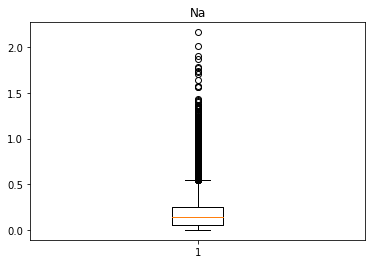

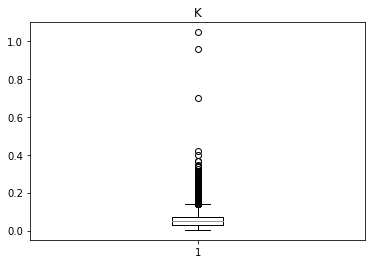

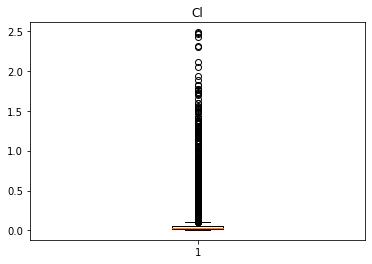

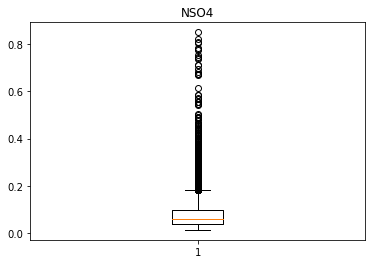

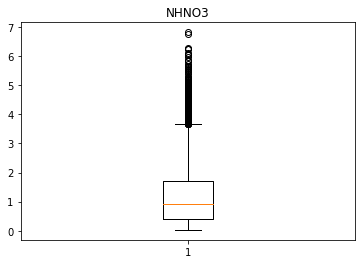

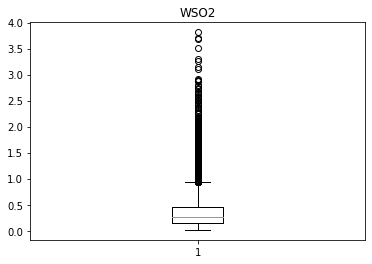

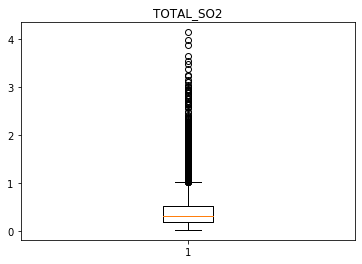

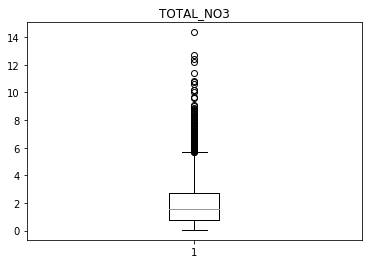

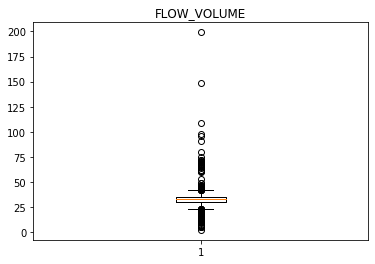

In [526]:
for col_name in test_key_fields:
    #air_status[col_name].hist()
    plt.boxplot(air_status[col_name].dropna())
    plt.title(col_name)
    plt.show()

In [527]:

test_key_fields.remove('TOTAL_NO3')
sc = StandardScaler()

In [528]:
x = sc.fit_transform(air_status[test_key_fields])
y = air_status['TOTAL_NO3']
print(x)
print(y)



[[ 1.31625218  2.21247451  2.34015301 ... -0.14122563 -0.20077606
   0.63570192]
 [ 0.28318755 -0.13823673  0.18461987 ...  0.05732535  0.01889341
   0.75176771]
 [ 1.12585281  0.59039316  0.44212651 ...  0.33265971  0.30908584
   0.89708634]
 ...
 [ 0.08652616 -0.46416299 -0.11500084 ...  0.88875756  0.85516223
   0.65793897]
 [ 0.63149145 -0.24486549  0.22191172 ...  1.2737086   1.29616894
   0.56629123]
 [ 1.21622904 -0.47914677  0.83015463 ...  0.80395974  0.820139
   0.60506117]]
0       6.0754
1       4.0244
2       5.7479
3       5.0664
4       5.5863
5       7.3366
6       6.0183
7       4.3572
8       6.8593
9       5.0859
10      3.0003
11      5.9289
12      4.3687
13      4.1227
14      4.4034
15      5.1839
16      2.6052
17      1.6309
18      1.9709
19      4.2571
20      1.2472
21      1.4104
22      1.3970
23      1.4969
24      1.3198
25      0.5225
26      0.7587
27      0.5721
28      0.4855
29      2.6958
         ...  
6129    0.3003
6130    0.7147
6131    0.8688


In [529]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



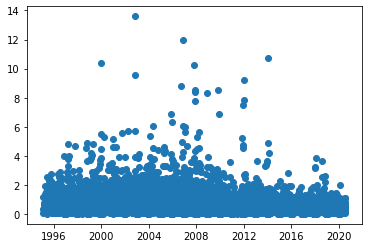

In [530]:
plt.scatter(air_status.DATEON,air_status.TNO3)


In [531]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

array([-6.64874754e-07,  8.60931430e-01, -7.02704190e-08,  1.50504597e-06,
       -9.64122931e-08,  3.61868975e-07, -1.16588981e-06,  1.67623075e-06,
        3.17919184e-04,  1.04710053e+00,  2.45708440e-03, -2.66635092e-03,
       -7.06619454e-08])

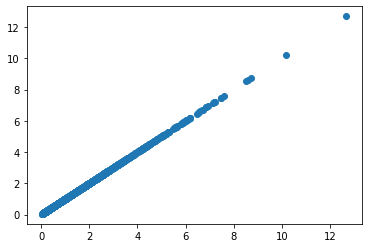

In [532]:
plt.scatter(y_predict, y_test)
lr.coef_



In [533]:
print("R2=", lr.score(x_train, y_train))
print("sum of squared error=", mean_squared_error(y_predict, y_test) * len(y_test))

R2= 0.9999999990080165
sum of squared error= 2.951001261982285e-06


In [534]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)
y_predict_xgb =xgb.predict(x_test)


[21:02:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


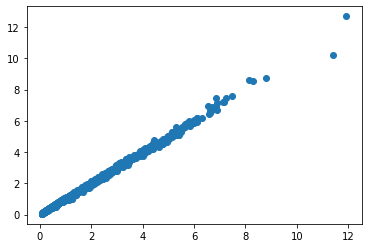

In [535]:
plt.scatter(y_predict_xgb, y_test)

In [536]:
print("xgb R2=", xgb.score(x_train, y_train))
print("xgb sum of squared error=", mean_squared_error(y_predict_xgb, y_test) * len(y_test))

xgb R2= 0.9985184167980848
xgb sum of squared error= 8.685121614666903


In [537]:
#scaling the supplied test data
# no na in the test
scaled_test_x = sc.fit_transform(test[test_key_fields])
print(scaled_test_x)

[[ 2.31514063  0.82460999  1.24239487 ...  0.65210153  0.67113109
   0.56430115]
 [ 1.30988089  1.53655268  0.22609609 ...  0.13816694  0.10829313
   5.54314064]
 [ 1.20565012  0.40315458  0.87699879 ... -0.13559272 -0.17078324
   0.50490934]
 ...
 [-0.05327329 -0.4193252  -0.09378919 ... -0.0286519   0.06021866
   0.51625196]
 [-0.17682576 -0.49659639 -0.15763528 ...  0.67132436  0.68966828
   0.36521231]
 [ 0.01320041 -0.3889406  -0.08101997 ...  0.41148469  0.44542554
   0.47595984]]


In [538]:
test_y_predict = lr.predict(scaled_test_x)
test['TOTAL_NO3'] = test_y_predict

results=test[['SITE_ID','DATEON','TOTAL_NO3']]
results.head()
results.to_csv("submission_practitioners_team_2.csv", index=False)